In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
#Reading the dataset
car_sales_df = pd.read_excel('Resources/combined-feat-sales_v2.xlsx')
car_sales_df

,Axander-Model,id,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,BMW 7-series,272,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,BMW 7-series,273,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,BMW 7-series,274,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,BMW 7-series,275,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,BMW 7-series,276,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,BMW 7-series,277,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,6,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
6,Chevrolet Colorado,487,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,Chevrolet Colorado,488,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
8,Chevrolet Colorado,489,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,Chevrolet Colorado,490,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848


In [4]:
car_sales = car_sales_df.copy()

car_sales_clean = car_sales.copy()
car_sales_clean = car_sales_clean.drop(['Axander-Model', 'id','displ','cyl'], axis=1)
 

car_sales_clean

,year,model,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,2016,BMW 750i,Gasoline,large car,SemiAuto-8,4WD,6,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
6,2016,CHEVROLET Colorado,Gasoline,pickup,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,2016,CHEVROLET Colorado,Gasoline,pickup,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
8,2016,CHEVROLET Colorado,Gasoline,pickup,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,2016,CHEVROLET Colorado,Gasoline,pickup,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848


In [5]:
car_sales_sliced = car_sales_clean.copy()
bins = (3,23,50,114)
group_names = ['low-mpg','medium-mpg','high-mpg']
car_sales_sliced['cmb_mpg'] = pd.cut(car_sales_sliced['cmb_mpg'],bins = bins,labels = group_names)


In [6]:
car_sales_sliced['cmb_mpg'].unique()

[medium-mpg, low-mpg, high-mpg]
Categories (3, object): [low-mpg < medium-mpg < high-mpg]

In [7]:
lb = LabelEncoder()
car_sales_encoded = car_sales_sliced.copy()
car_sales_encoded['cmb_mpg']= lb.fit_transform(car_sales_encoded['cmb_mpg'])
car_sales_encoded['model']= lb.fit_transform(car_sales_encoded['model'])    
car_sales_encoded['fuel_type']= lb.fit_transform(car_sales_encoded['fuel_type'])
car_sales_encoded['vehicle_class']= lb.fit_transform(car_sales_encoded['vehicle_class'])
car_sales_encoded['trans']= lb.fit_transform(car_sales_encoded['trans'])
car_sales_encoded['drive']= lb.fit_transform(car_sales_encoded['drive'])
car_sales_encoded['smartway']= lb.fit_transform(car_sales_encoded['smartway'])

car_sales_encoded.head()

,year,model,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,1,3,0,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
1,2016,1,3,0,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
2,2016,2,3,0,9,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
3,2016,2,3,0,9,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
4,2016,2,3,0,9,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909


In [8]:
car_sales_encoded['cmb_mpg'].value_counts()

1    411
2     81
0     18
Name: cmb_mpg, dtype: int64

In [9]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']

In [10]:
# Train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [12]:
#Define the encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] = 1
    return one_hot_encode

In [13]:
y = encoder.transform(y)
Y = one_hot_encode(y)


In [14]:
#Shuffle the dataset to mix up the rows
X,Y = shuffle(X,Y,random_state=1)

In [15]:
# Convert the dataset into train and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=415, test_size=0.20)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(408, 15)
(408, 3)
(102, 15)


In [17]:
# Apply Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train[:10]

array([[-3.63136520e-02,  2.63921501e-01, -9.03057104e-01,
        -3.14882663e-01, -7.40013809e-01, -9.42809042e-01,
         1.01305417e+00, -3.26321583e-01, -4.23367814e-01,
        -7.88014442e-02, -3.61787303e-02,  9.55745310e-02,
         1.89952979e-01,  1.57225616e-01, -4.69809866e-01],
       [-1.27097782e+00, -4.29669303e-01,  3.98876813e-01,
         3.21457136e+00, -7.40013809e-01, -9.42809042e-01,
         3.75205247e-01,  4.61702000e-02,  2.84268679e-01,
         1.18202166e+00, -3.61787303e-02, -8.64040569e-01,
        -9.10663191e-01, -9.12294497e-01, -8.00328845e-01],
       [-3.63136520e-02,  1.82450081e+00,  3.98876813e-01,
        -3.14882663e-01,  1.57951731e+00, -9.42809042e-01,
        -2.62643673e-01, -4.32747807e-01, -5.64895112e-01,
        -1.33962455e+00, -3.61787303e-02,  1.41445440e+00,
        -3.75088447e-01, -3.67446513e-01,  5.78982393e-01],
       [-3.63136520e-02, -9.49862405e-01,  3.98876813e-01,
        -3.14882663e-01, -3.53425289e-01,  1.06066017

In [19]:
# Define the important parameters and variable 
#to work with the tensors

learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
print('n_dim',n_dim)

n_dim 15


In [20]:
n_class = 3
model_path = "Model/NMI"

#Define the number of hidden layers and number of neurons for each layer 
n_hidden_1 = 15
n_hidden_2 = 15
n_hidden_3 = 15
n_hidden_4 = 15

x = tf.placeholder(tf.float32,[None,n_dim])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None, n_class])

In [21]:
#Define the model
def multilayer_perceptron(x,weights,biases):
    #Hidden layer with RELU activationsed
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)   
    
    #Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #Output layer with linear activation
    output_layer = tf.matmul(layer_4,weights['out']+biases['out'])
    
    return output_layer
    

In [22]:
#Define the weights and the biases for each layer
weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [23]:
#Initialized all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
#Call your model defined
y = multilayer_perceptron(x,weights,biases)

In [25]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(cost_function)

W0307 16:38:31.814287 140735975539584 deprecation.py:323] From <ipython-input-25-6fcdfce56050>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [26]:
sess = tf.Session()
sess.run(init)



In [27]:
# Calculate the cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y_: y_train})
    cost = sess.run(cost_function, 
                    feed_dict={x: X_train, y_: y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), 
                                  tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                      tf.float32))
   # print("Accuracy: ",(sess.run(accuracy,
#                              feed_dict={x: x_test,y_test})))
    pred_y = sess.run(y,feed_dict={x:X_test})
    mse = tf.reduce_mean(tf.square(pred_y-y_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy,feed_dict={x: X_train, y_: y_train}))
    accuracy_history.append(accuracy)
    
    print('epoch: ',epoch,' - ','cost: ',cost, ' - MSE: ',mse_,
          ' - Train Accuracy: ',accuracy)

epoch:  0  -  cost:  7.7620254  - MSE:  404.005487439683  - Train Accuracy:  0.8161765
epoch:  1  -  cost:  0.9131669  - MSE:  0.4878235750835461  - Train Accuracy:  0.3602941
epoch:  2  -  cost:  1.2994078  - MSE:  32.27201231138585  - Train Accuracy:  0.8161765
epoch:  3  -  cost:  1.000064  - MSE:  0.352755137603864  - Train Accuracy:  0.30392158
epoch:  4  -  cost:  0.43442798  - MSE:  2.946329933321723  - Train Accuracy:  0.8112745
epoch:  5  -  cost:  0.4774474  - MSE:  5.734378632606773  - Train Accuracy:  0.8161765
epoch:  6  -  cost:  0.7181983  - MSE:  0.8603489933123153  - Train Accuracy:  0.60784316
epoch:  7  -  cost:  0.68828434  - MSE:  11.444055874481634  - Train Accuracy:  0.8161765
epoch:  8  -  cost:  0.78744763  - MSE:  0.7076373500212483  - Train Accuracy:  0.50490195
epoch:  9  -  cost:  0.416587  - MSE:  7.378542741086159  - Train Accuracy:  0.8161765
epoch:  10  -  cost:  0.5210651  - MSE:  2.0688402262479992  - Train Accuracy:  0.7622549
epoch:  11  -  cost:  0

epoch:  91  -  cost:  0.22596219  - MSE:  16.061328410294347  - Train Accuracy:  0.8480392
epoch:  92  -  cost:  0.22560428  - MSE:  15.754234189932001  - Train Accuracy:  0.8480392
epoch:  93  -  cost:  0.22532101  - MSE:  16.492854695105194  - Train Accuracy:  0.8480392
epoch:  94  -  cost:  0.2249446  - MSE:  16.02888075322947  - Train Accuracy:  0.8480392
epoch:  95  -  cost:  0.22470532  - MSE:  16.76216710818334  - Train Accuracy:  0.8480392
epoch:  96  -  cost:  0.22425999  - MSE:  16.052588266718605  - Train Accuracy:  0.8480392
epoch:  97  -  cost:  0.22394541  - MSE:  16.71985629017233  - Train Accuracy:  0.8480392
epoch:  98  -  cost:  0.22395642  - MSE:  16.020565474744117  - Train Accuracy:  0.8480392
epoch:  99  -  cost:  0.22328293  - MSE:  16.965899393389414  - Train Accuracy:  0.8480392
epoch:  100  -  cost:  0.22305249  - MSE:  16.28596247333784  - Train Accuracy:  0.8480392
epoch:  101  -  cost:  0.22268568  - MSE:  16.941948088715108  - Train Accuracy:  0.8480392
ep

epoch:  181  -  cost:  0.20927872  - MSE:  21.472616518179752  - Train Accuracy:  0.8480392
epoch:  182  -  cost:  0.20915052  - MSE:  21.28499104456797  - Train Accuracy:  0.8480392
epoch:  183  -  cost:  0.20905577  - MSE:  21.474918939998588  - Train Accuracy:  0.8480392
epoch:  184  -  cost:  0.20893933  - MSE:  21.35637786771188  - Train Accuracy:  0.8480392
epoch:  185  -  cost:  0.20884949  - MSE:  21.576593641249325  - Train Accuracy:  0.8480392
epoch:  186  -  cost:  0.2087328  - MSE:  21.469090723236885  - Train Accuracy:  0.8480392
epoch:  187  -  cost:  0.20864819  - MSE:  21.697600703900925  - Train Accuracy:  0.8480392
epoch:  188  -  cost:  0.20858471  - MSE:  21.591286781560527  - Train Accuracy:  0.8480392
epoch:  189  -  cost:  0.2088946  - MSE:  22.384357232730466  - Train Accuracy:  0.8480392
epoch:  190  -  cost:  0.20960301  - MSE:  20.799209890518732  - Train Accuracy:  0.8480392
epoch:  191  -  cost:  0.20841648  - MSE:  22.30284959145596  - Train Accuracy:  0.8

epoch:  271  -  cost:  0.20633903  - MSE:  24.57713345026228  - Train Accuracy:  0.8480392
epoch:  272  -  cost:  0.20503956  - MSE:  25.96552618800382  - Train Accuracy:  0.8480392
epoch:  273  -  cost:  0.20453931  - MSE:  26.978471413819925  - Train Accuracy:  0.8480392
epoch:  274  -  cost:  0.20464018  - MSE:  27.034972406117703  - Train Accuracy:  0.8480392
epoch:  275  -  cost:  0.20525625  - MSE:  25.672993703708045  - Train Accuracy:  0.8480392
epoch:  276  -  cost:  0.20452903  - MSE:  26.749591078083  - Train Accuracy:  0.8480392
epoch:  277  -  cost:  0.20443483  - MSE:  27.234116789958616  - Train Accuracy:  0.8480392
epoch:  278  -  cost:  0.20477125  - MSE:  26.21555394281963  - Train Accuracy:  0.8480392
epoch:  279  -  cost:  0.20437188  - MSE:  27.1468826194784  - Train Accuracy:  0.8480392
epoch:  280  -  cost:  0.20467556  - MSE:  26.488428492034615  - Train Accuracy:  0.8480392
epoch:  281  -  cost:  0.20431803  - MSE:  27.39527130697616  - Train Accuracy:  0.84803

epoch:  361  -  cost:  0.2032838  - MSE:  31.260801993434583  - Train Accuracy:  0.8480392
epoch:  362  -  cost:  0.2033935  - MSE:  30.528331065600387  - Train Accuracy:  0.8480392
epoch:  363  -  cost:  0.20324157  - MSE:  31.07311050201572  - Train Accuracy:  0.8480392
epoch:  364  -  cost:  0.20322353  - MSE:  31.15797499030136  - Train Accuracy:  0.8480392
epoch:  365  -  cost:  0.20331536  - MSE:  30.84107008540891  - Train Accuracy:  0.8480392
epoch:  366  -  cost:  0.20324464  - MSE:  31.36101360363159  - Train Accuracy:  0.8480392
epoch:  367  -  cost:  0.2037377  - MSE:  29.88921761200019  - Train Accuracy:  0.8480392
epoch:  368  -  cost:  0.2034733  - MSE:  30.557925941865637  - Train Accuracy:  0.8480392
epoch:  369  -  cost:  0.20327923  - MSE:  31.13540188090627  - Train Accuracy:  0.8480392
epoch:  370  -  cost:  0.20318136  - MSE:  31.64385368767114  - Train Accuracy:  0.8480392
epoch:  371  -  cost:  0.20387934  - MSE:  29.784149989348542  - Train Accuracy:  0.8480392

epoch:  451  -  cost:  0.20292181  - MSE:  33.62776599963442  - Train Accuracy:  0.8480392
epoch:  452  -  cost:  0.20283635  - MSE:  34.02592633015976  - Train Accuracy:  0.8480392
epoch:  453  -  cost:  0.20276508  - MSE:  34.391512720816  - Train Accuracy:  0.8480392
epoch:  454  -  cost:  0.20290303  - MSE:  34.72958780621452  - Train Accuracy:  0.8480392
epoch:  455  -  cost:  0.20357274  - MSE:  31.73330336535297  - Train Accuracy:  0.8480392
epoch:  456  -  cost:  0.20333967  - MSE:  32.37851366293511  - Train Accuracy:  0.8480392
epoch:  457  -  cost:  0.20316704  - MSE:  32.93715050421837  - Train Accuracy:  0.8480392
epoch:  458  -  cost:  0.20303375  - MSE:  33.431397001613675  - Train Accuracy:  0.8480392
epoch:  459  -  cost:  0.20292757  - MSE:  33.87463678268837  - Train Accuracy:  0.8480392
epoch:  460  -  cost:  0.20284088  - MSE:  34.27693052366143  - Train Accuracy:  0.8480392
epoch:  461  -  cost:  0.20278622  - MSE:  34.645630833271234  - Train Accuracy:  0.8480392

epoch:  541  -  cost:  0.20252542  - MSE:  36.845563842273265  - Train Accuracy:  0.8480392
epoch:  542  -  cost:  0.2027571  - MSE:  35.34654228464951  - Train Accuracy:  0.8480392
epoch:  543  -  cost:  0.20269503  - MSE:  35.694144183229895  - Train Accuracy:  0.8480392
epoch:  544  -  cost:  0.20264207  - MSE:  36.01643520802974  - Train Accuracy:  0.8480392
epoch:  545  -  cost:  0.2025963  - MSE:  36.31703040986857  - Train Accuracy:  0.8480392
epoch:  546  -  cost:  0.20255639  - MSE:  36.59879800351526  - Train Accuracy:  0.8480392
epoch:  547  -  cost:  0.2025212  - MSE:  36.86407016960379  - Train Accuracy:  0.8480392
epoch:  548  -  cost:  0.20253973  - MSE:  37.114886747385704  - Train Accuracy:  0.8480392
epoch:  549  -  cost:  0.20265713  - MSE:  36.015185490232284  - Train Accuracy:  0.8480392
epoch:  550  -  cost:  0.20260933  - MSE:  36.3222667486461  - Train Accuracy:  0.8480392
epoch:  551  -  cost:  0.20256771  - MSE:  36.609696154910885  - Train Accuracy:  0.848039

epoch:  632  -  cost:  0.20275651  - MSE:  36.34924563288809  - Train Accuracy:  0.8480392
epoch:  633  -  cost:  0.20269226  - MSE:  36.70837655442806  - Train Accuracy:  0.8480392
epoch:  634  -  cost:  0.20263772  - MSE:  37.040604907558865  - Train Accuracy:  0.8480392
epoch:  635  -  cost:  0.20259087  - MSE:  37.349742039491595  - Train Accuracy:  0.8480392
epoch:  636  -  cost:  0.20255016  - MSE:  37.638884461458964  - Train Accuracy:  0.8480392
epoch:  637  -  cost:  0.20251441  - MSE:  37.91058245652691  - Train Accuracy:  0.8480392
epoch:  638  -  cost:  0.20248276  - MSE:  38.16691511793099  - Train Accuracy:  0.8480392
epoch:  639  -  cost:  0.20245455  - MSE:  38.409611277475136  - Train Accuracy:  0.8480392
epoch:  640  -  cost:  0.20242916  - MSE:  38.64264385650783  - Train Accuracy:  0.8480392
epoch:  641  -  cost:  0.20240623  - MSE:  38.86449849747683  - Train Accuracy:  0.8480392
epoch:  642  -  cost:  0.20238891  - MSE:  39.076260951281725  - Train Accuracy:  0.84

epoch:  722  -  cost:  0.2023127  - MSE:  40.1832282463532  - Train Accuracy:  0.8480392
epoch:  723  -  cost:  0.20229931  - MSE:  40.354895108623666  - Train Accuracy:  0.8480392
epoch:  724  -  cost:  0.2023299  - MSE:  40.52257891578951  - Train Accuracy:  0.8480392
epoch:  725  -  cost:  0.20241033  - MSE:  39.23645094688307  - Train Accuracy:  0.8480392
epoch:  726  -  cost:  0.20238864  - MSE:  39.452380191186364  - Train Accuracy:  0.8480392
epoch:  727  -  cost:  0.20236897  - MSE:  39.65863552661497  - Train Accuracy:  0.8480392
epoch:  728  -  cost:  0.20235105  - MSE:  39.85607664043554  - Train Accuracy:  0.8480392
epoch:  729  -  cost:  0.2023346  - MSE:  40.04546769101294  - Train Accuracy:  0.8480392
epoch:  730  -  cost:  0.20231941  - MSE:  40.22949398139851  - Train Accuracy:  0.8480392
epoch:  731  -  cost:  0.2023054  - MSE:  40.406584225063234  - Train Accuracy:  0.8480392
epoch:  732  -  cost:  0.20229244  - MSE:  40.577258487987855  - Train Accuracy:  0.8480392


epoch:  812  -  cost:  0.20260578  - MSE:  38.505016089631745  - Train Accuracy:  0.8480392
epoch:  813  -  cost:  0.2025607  - MSE:  38.814101965319  - Train Accuracy:  0.8480392
epoch:  814  -  cost:  0.20252153  - MSE:  39.10291698217058  - Train Accuracy:  0.8480392
epoch:  815  -  cost:  0.20248722  - MSE:  39.37408074036156  - Train Accuracy:  0.8480392
epoch:  816  -  cost:  0.2024569  - MSE:  39.62971450612307  - Train Accuracy:  0.8480392
epoch:  817  -  cost:  0.20242994  - MSE:  39.871754759018266  - Train Accuracy:  0.8480392
epoch:  818  -  cost:  0.20240572  - MSE:  40.10156187250032  - Train Accuracy:  0.8480392
epoch:  819  -  cost:  0.2023839  - MSE:  40.320324346140936  - Train Accuracy:  0.8480392
epoch:  820  -  cost:  0.20236401  - MSE:  40.53174914699092  - Train Accuracy:  0.8480392
epoch:  821  -  cost:  0.20234594  - MSE:  40.734065357966266  - Train Accuracy:  0.8480392
epoch:  822  -  cost:  0.20232937  - MSE:  40.9279303948769  - Train Accuracy:  0.8480392
e

epoch:  903  -  cost:  0.20223749  - MSE:  43.21286257454839  - Train Accuracy:  0.8480392
epoch:  904  -  cost:  0.20241053  - MSE:  40.39850313075483  - Train Accuracy:  0.8480392
epoch:  905  -  cost:  0.2023878  - MSE:  40.622592108737805  - Train Accuracy:  0.8480392
epoch:  906  -  cost:  0.20236725  - MSE:  40.836103541551054  - Train Accuracy:  0.8480392
epoch:  907  -  cost:  0.20234859  - MSE:  41.04027142725759  - Train Accuracy:  0.8480392
epoch:  908  -  cost:  0.20233159  - MSE:  41.236032656202944  - Train Accuracy:  0.8480392
epoch:  909  -  cost:  0.20231594  - MSE:  41.42382191748753  - Train Accuracy:  0.8480392
epoch:  910  -  cost:  0.20230155  - MSE:  41.60636280664652  - Train Accuracy:  0.8480392
epoch:  911  -  cost:  0.20228826  - MSE:  41.78201862109794  - Train Accuracy:  0.8480392
epoch:  912  -  cost:  0.20227595  - MSE:  41.951310769756006  - Train Accuracy:  0.8480392
epoch:  913  -  cost:  0.20226452  - MSE:  42.11471064801475  - Train Accuracy:  0.8480

epoch:  993  -  cost:  0.20226467  - MSE:  42.32614039889073  - Train Accuracy:  0.8480392
epoch:  994  -  cost:  0.20225391  - MSE:  42.4841583720763  - Train Accuracy:  0.8480392
epoch:  995  -  cost:  0.20224382  - MSE:  42.63877032935137  - Train Accuracy:  0.8480392
epoch:  996  -  cost:  0.2022344  - MSE:  42.78847440547035  - Train Accuracy:  0.8480392
epoch:  997  -  cost:  0.2022256  - MSE:  42.93357899591429  - Train Accuracy:  0.8480392
epoch:  998  -  cost:  0.2022173  - MSE:  43.074362172463005  - Train Accuracy:  0.8480392
epoch:  999  -  cost:  0.20220952  - MSE:  43.21109546295869  - Train Accuracy:  0.8480392


In [28]:
save_path = saver.save(sess,model_path)
print('Model saved in file: %s' % save_path)

Model saved in file: Model/NMI


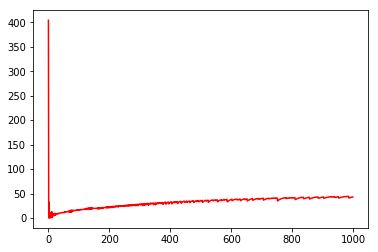

In [29]:
#plot mse
plt.plot(mse_history,'r')
plt.show()

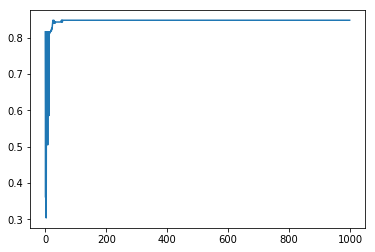

In [30]:
#Plot accuracy graph
plt.plot(accuracy_history)
plt.show()

In [31]:
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(
    tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ',
      (sess.run(accuracy, feed_dict ={x: X_test, y_: y_test})))


Test Accuracy:  0.8137255


In [32]:
#Print the final mean square error
pred_y = sess.run(y,feed_dict={x:X_test} )
mse = tf.reduce_mean(tf.square(pred_y-y_test))
print("MSE: %.4f" % sess.run(mse))

MSE: 43.2111
